## Importing :

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score,accuracy_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA



## Load Data and split the train and test Data :

In [2]:

digites=load_digits()
x_train,x_test,y_train,y_test = train_test_split(digites.data,digites.target,test_size=0.3)


## Preprocessing :

In [3]:
scaller=MinMaxScaler()
x_train=scaller.fit_transform(x_train)
x_test=scaller.transform(x_test)


## PCA :

In [4]:

pca=PCA(n_components=32)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

## Caculate the matric :

In [5]:
def calculat_matrix(y_train,y_test,pred_x_train,pred_x_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=pred_x_train)
    acc_test=accuracy_score(y_test,pred_x_test)
    p=precision_score(y_true=y_test,y_pred=pred_x_test,average='weighted')
    r=recall_score(y_true=y_test,y_pred=pred_x_test,average='weighted')

    print(f"acc_tran=> {acc_train} - acc_test=> {acc_test} - presion=> {p} - recall=>{r}")

    return acc_train,acc_test,p,r

## Random Forest :

In [6]:
rf=RandomForestClassifier(max_depth=128,n_estimators=256)
rf.fit(x_train,y_train)

pred_x_train=rf.predict(x_train)
pred_x_test=rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)

acc_tran=> 1.0 - acc_test=> 0.9703703703703703 - presion=> 0.9711865548714509 - recall=>0.9703703703703703


## SVM :

In [7]:

svm=SVC(kernel='linear')
svm.fit(x_train,y_train)


pred_x_train=svm.predict(x_train)
pred_x_test=svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)

acc_tran=> 0.994431185361973 - acc_test=> 0.9833333333333333 - presion=> 0.983665011939032 - recall=>0.9833333333333333


## ANN :

In [8]:
ann=MLPClassifier(hidden_layer_sizes=256,batch_size=64,solver='adam',learning_rate='adaptive')
ann.fit(x_train,y_train)

pred_x_train=ann.predict(x_train)
pred_x_test=ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)

acc_tran=> 1.0 - acc_test=> 0.9851851851851852 - presion=> 0.9853563362817725 - recall=>0.9851851851851852


## Compersion :

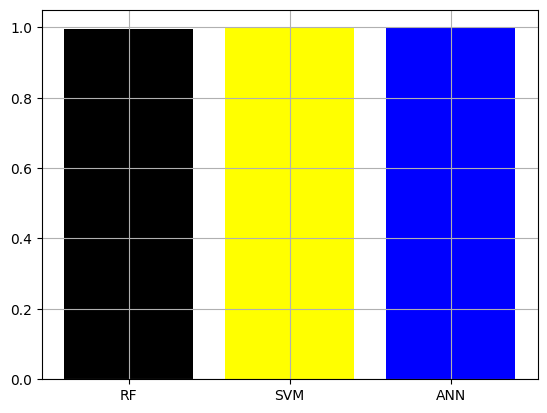

In [9]:
acc_train=[acc_train_svm,acc_train_rf,acc_train_ann]
title = ["RF","SVM","ANN"]
colors=["black","yellow","blue"]
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()


## Test Models :

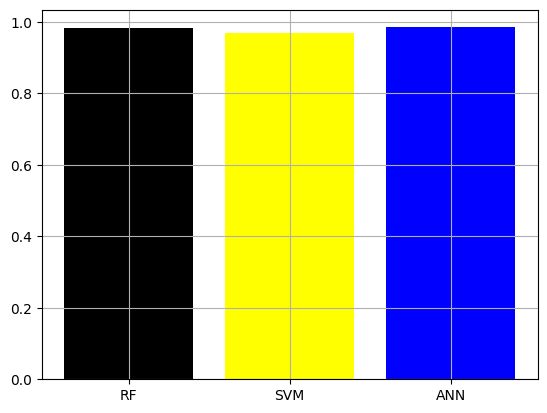

In [10]:
acc_test=[acc_test_svm,acc_test_rf,acc_test_ann]
title = ["RF","SVM","ANN"]
colors=["black","yellow","blue"]
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()